# Assignment 5 - Implement KNN

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the data
x_tr = pd.read_csv('C:/Users/Dell/Downloads/titan_train.csv')
x_test = pd.read_csv('C:/Users/Dell/Downloads/titan_test.csv')
x_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
y_tr = x_tr['Survived']

In [5]:
# Studying the data values
y_tr.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
y_tr.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Checking the cabin feature
x_tr['Cabin'].isna().sum()/x_tr.shape[0]

0.7710437710437711

77% of the data is missing in the Cabin column. So we will drop this column as well as PassengerId column since it has unique values.

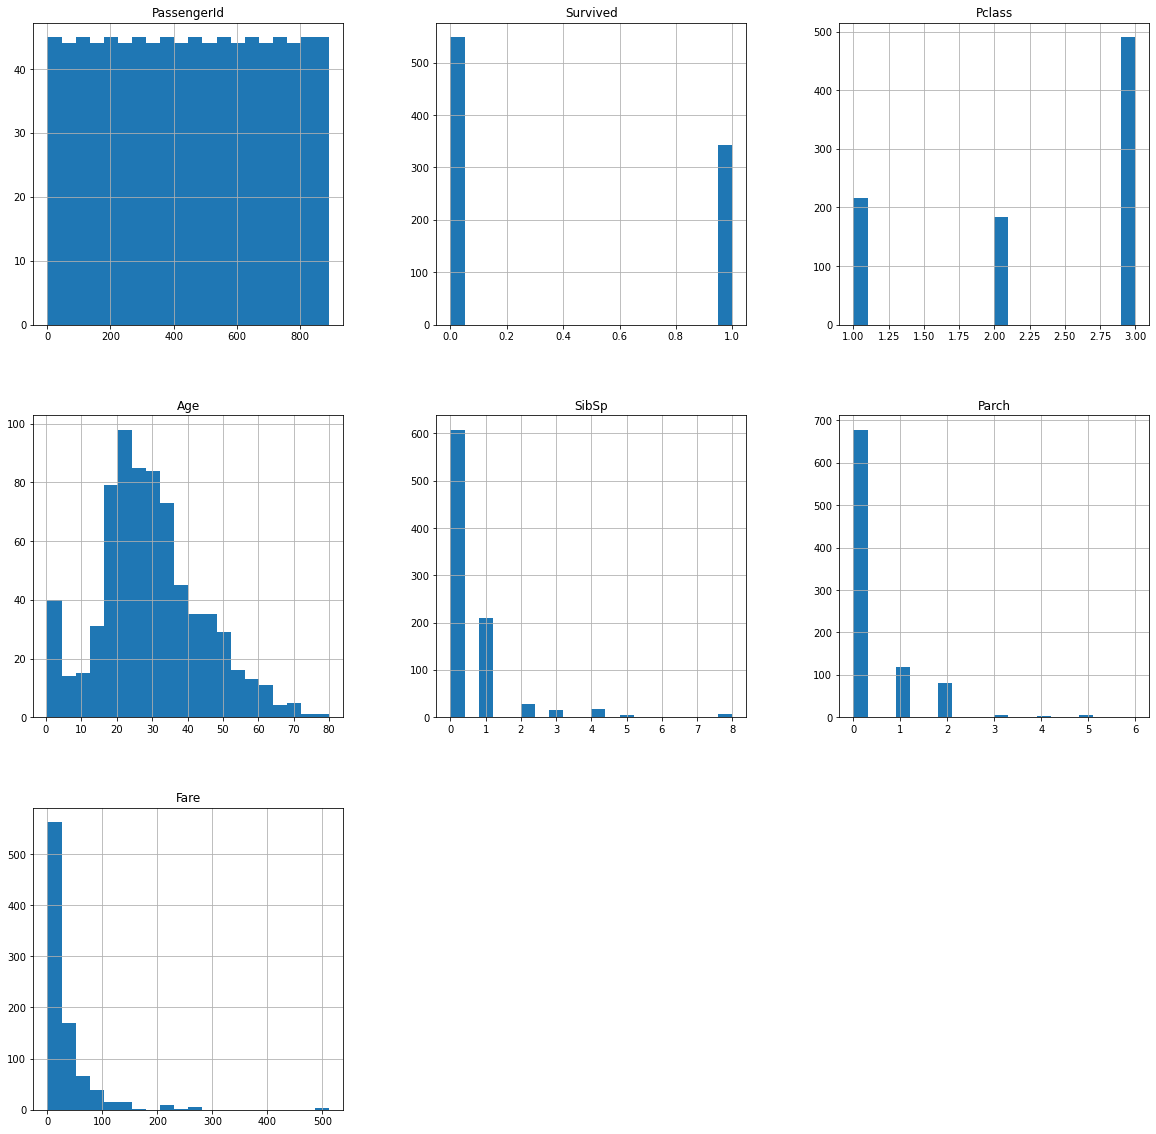

In [9]:
# BAsic EDA and data cleaning

x_tr.hist(bins = 20, figsize = (20,20))
plt.show()

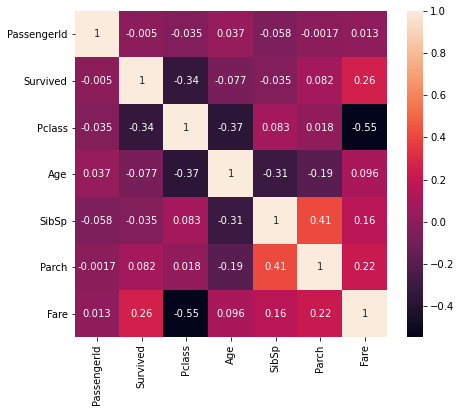

In [10]:
# Correlation plot
plt.figure(figsize = (7,6))
sns.heatmap(x_tr.corr(), annot = True)
plt.show()

In [11]:
# Dropping the columns that are not required

x_tr.drop(['Name','PassengerId','Ticket','Cabin'], axis = 1, inplace = True)
x_test.drop(['Name','PassengerId','Ticket','Cabin'], axis = 1, inplace = True)

x_tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Dealing with missing values in the training set and test set

x_tr['Embarked'] = x_tr['Embarked'].fillna('S')
x_tr['Age'] = x_tr['Age'].fillna(x_tr['Age'].mean())


x_test['Embarked'] = x_test['Embarked'].fillna('S')
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

x_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# Converting the categorical variables

x_tr = pd.get_dummies(x_tr, columns = ['Sex', 'Embarked'], drop_first = False)
x_test = pd.get_dummies(x_test, columns = ['Sex', 'Embarked'], drop_first = False)

x_tr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [15]:
# treating the missing value in the test set

x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean())
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [16]:
y_tr.shape

(891,)

In [17]:
# Scaling the data
scaled_x_tr = StandardScaler().fit_transform(x_tr)
scaled_x_test = StandardScaler().fit_transform(x_test)

In [18]:
# Applying PCA

pca_model = PCA(n_components = 0.95)
pca_scaled_x = pca_model.fit_transform(scaled_x_tr)

pca_model.explained_variance_ratio_

array([0.26196203, 0.17931188, 0.1521482 , 0.12721991, 0.0876279 ,
       0.06664062, 0.05123602, 0.04365245])

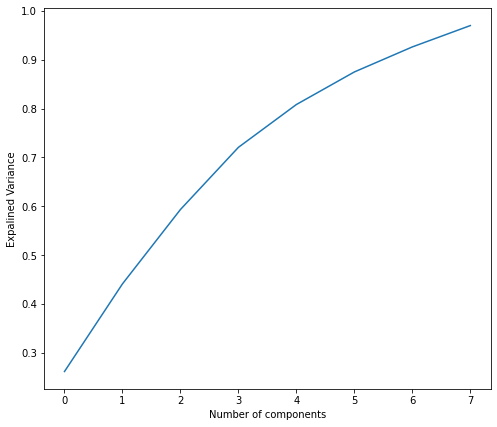

In [19]:
# Plotting to see how many components shoud be used

plt.figure(figsize = (8,7))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Expalined Variance')
plt.show()

In [20]:
pca_model.n_components_

8

In [56]:
# Splitting data into training and validation data

x_tr, x_ts, val_tr, val_test = train_test_split(pca_scaled_x, y_tr, test_size = 0.3)
x_tr.shape, x_ts.shape, val_tr.shape, val_test.shape

((623, 8), (268, 8), (623,), (268,))

In [57]:
# Find the optimal number of k
params = {'n_neighbors': range(1, 10)}

gscv_model = GridSearchCV(KNeighborsClassifier(), params)

In [58]:
# Fitting the model
gscv_model.fit(x_tr, val_tr)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [59]:
# best value of k
gscv_model.best_params_

{'n_neighbors': 2}

In [60]:
# Applying KNN

knn_model = KNeighborsClassifier(n_neighbors = 2).fit(x_tr, val_tr)

pred = knn_model.predict(x_ts)

In [61]:
# confusion matrix
cm = confusion_matrix(val_test, pred)
print(cm)

[[167   1]
 [  2  98]]


In [62]:
# Classification report
print(classification_report(val_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.99      0.98      0.98       100

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



In [63]:
# testing on test data
x_test.shape

(418, 10)

In [64]:
# Applying pca on the test data
pca_mod = PCA(n_components= 8)

In [65]:
pca_test = pca_mod.fit_transform(scaled_x_test)

In [66]:
pca_mod.explained_variance_ratio_

array([0.25455619, 0.1968992 , 0.17360053, 0.12081349, 0.09336117,
       0.06958407, 0.05654625, 0.03463909])

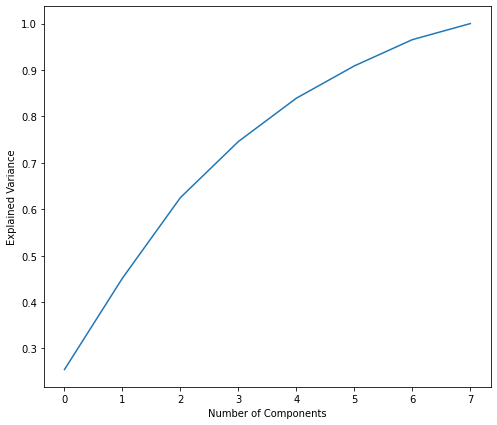

In [67]:
plt.figure(figsize = (8,7))
plt.plot(np.cumsum(pca_mod.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [68]:
pca_mod.n_components_

8

In [69]:
pred2 = knn_model.predict(pca_test)

In [70]:
pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,